# Assignment 3-1. Clustering

Cluster 20 beers using the hierarchical clustering method with complete linkage option.

1. Draw a dendrogram with complete linkage option.
2. Based on the dendrogram, whawt is the appropriate number of clusters?
3. Find the smallest cluster and list all bear names in the cluster.

* After drawing a plot such as dendrogram, histogram, etc., you can use `plt.savefig("dendrogram.png")` to save it as a file named `dendrogram.png`. This file will be located on the same folder.

In [1]:
import pandas as pd

df_beer = pd.read_csv('./beer.txt', delimiter=' ')
df_beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
# your code here
# ...

# Assignment 3-2. Association Rule Mining

#### NYC Restaurants dataset
This dataset contains approximately 180K restaurants in NYC with attributes of area, cuisine type, and sanitary grade.
(reference: https://github.com/rohanag/ADB-AssocRuleMining)

In [3]:
# this csv file has no header, thus we manually set column names.
df = pd.read_csv('./NYCDataset.csv', header=None, names=['area', 'cuisine', 'sanitaryGrade'])
df

,area,cuisine,sanitaryGrade
0,BROOKLYN,Chinese,Z
1,MANHATTAN,American,C
2,BRONX,Chicken,C
3,MANHATTAN,American,A
4,MANHATTAN,American,A
...,...,...,...
179726,BRONX,Latin (Cuban Dominican Puerto Rican South & C...,C
179727,QUEENS,Chinese,B
179728,BRONX,Italian,B
179729,MANHATTAN,Bakery,C


### Data Exploration
We draw 3 bar charts using 3 columns.

[Text(0.5, 1.0, 'Bar chart: area'),
 Text(0.5, 0, 'area'),
 Text(0, 0.5, 'Count')]

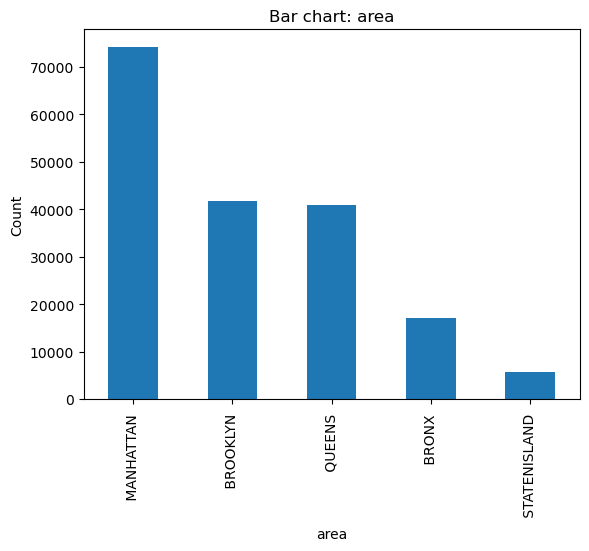

In [4]:
df['area'].value_counts().plot.bar().set(title='Bar chart: area', xlabel='area', ylabel='Count')

[Text(0.5, 1.0, 'Bar chart: cuisine'),
 Text(0.5, 0, 'cuisine'),
 Text(0, 0.5, 'Count')]

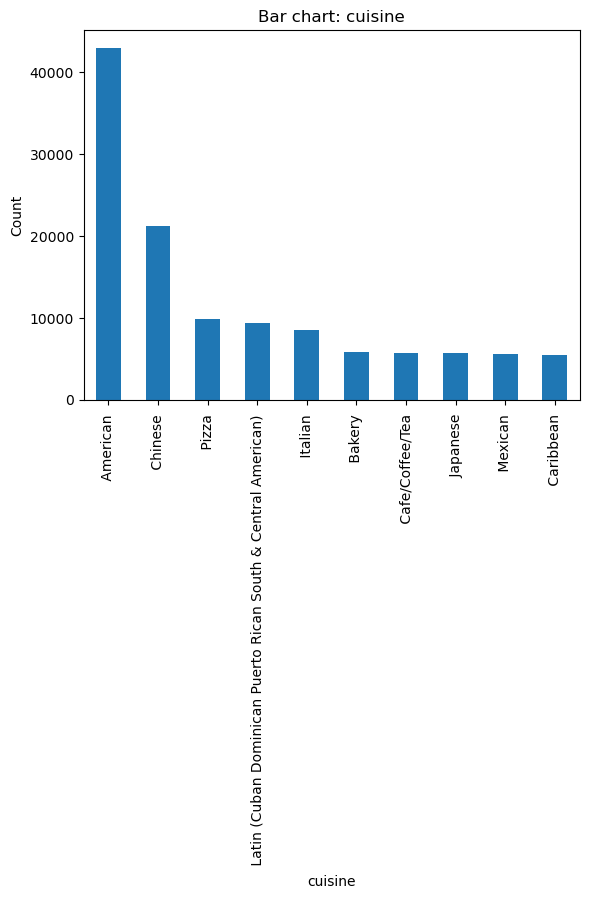

In [5]:
df['cuisine'].value_counts()[:10].plot.bar().set(title='Bar chart: cuisine', xlabel='cuisine', ylabel='Count') # [:10] for showing top 10 cuisine only

[Text(0.5, 1.0, 'Bar chart: SanitaryGrade'),
 Text(0.5, 0, 'SanitaryGrade'),
 Text(0, 0.5, 'Count')]

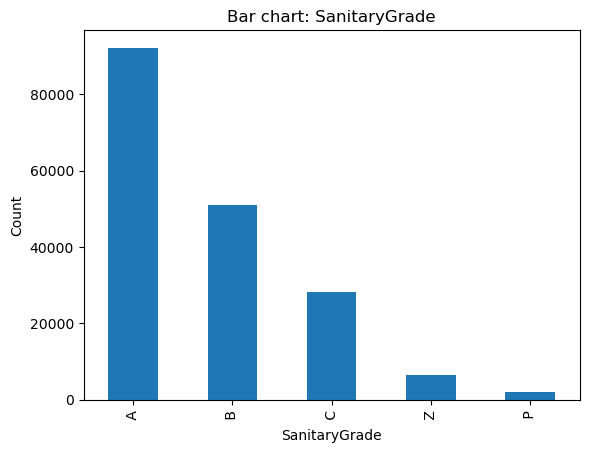

In [6]:
df['sanitaryGrade'].value_counts().plot.bar().set(title='Bar chart: SanitaryGrade', xlabel='SanitaryGrade', ylabel='Count')

(advanced) Alternatively, you can use the code below to do the same as above.

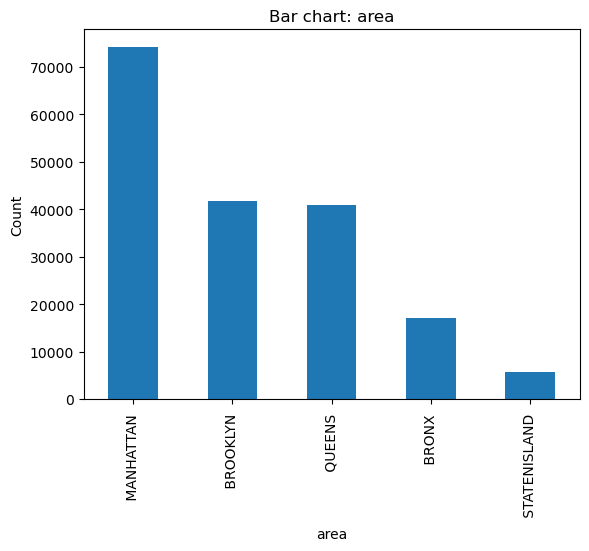

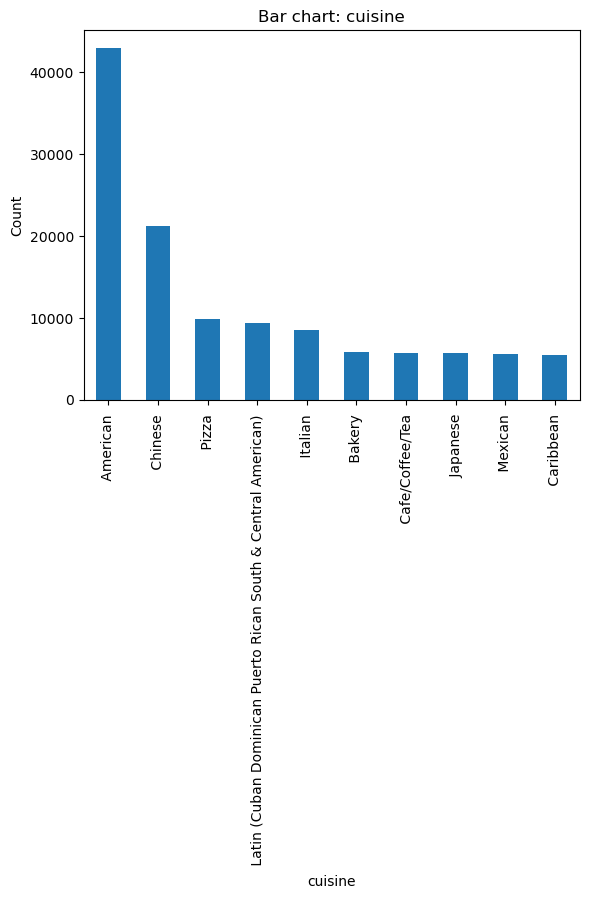

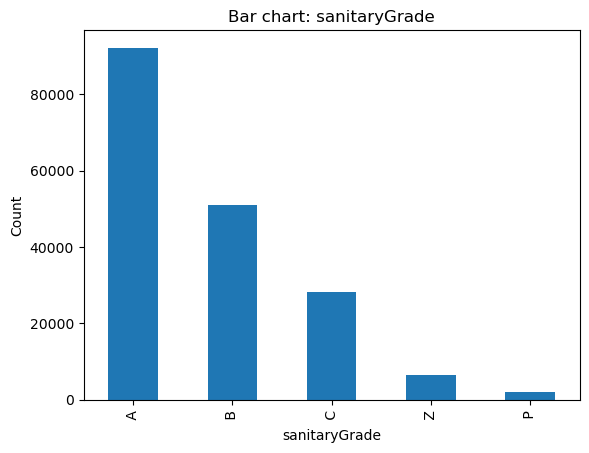

In [7]:
import matplotlib.pyplot as plt # just imported for `plt.show`

for col in df.columns:
    df_count = df[col].value_counts()
    if len(df_count) > 10:
        df_count = df_count[:10]
    df_count.plot.bar().set(title='Bar chart: {}'.format(col), xlabel=col, ylabel='Count')
    plt.show() # for showing all three charts (if you omit this line, only the last chart will be shown)

Here, we wanted to see if ...

- **certain types of restaurants are concentrated in certain districts** in new york city. 
- **connections existed between certain types of cuisines and sanitary grades**. 
- **the district with maximum number of A grade restaurants**.

Based on these intuitions, we apply association rule mining to this dataset.

## 1. Create a list of baskets containing area, cuisine, and sanitaryGrade.

In [8]:
# Create a blank list
basket_list = []

for i, row in df.iterrows(): # for each transaction row,
    basket = [row['area'], row['cuisine'], row['sanitaryGrade']] # define basket
    basket_list.append(basket) # append basket to the basket_list

In [9]:
# top 10 baskets
basket_list[:10]

[[' BROOKLYN ', ' Chinese ', ' Z'],
 [' MANHATTAN ', ' American ', ' C'],
 [' BRONX ', ' Chicken ', ' C'],
 [' MANHATTAN ', ' American ', ' A'],
 [' MANHATTAN ', ' American ', ' A'],
 [' MANHATTAN ', ' American ', ' C'],
 [' BRONX ', ' Pizza ', ' A'],
 [' MANHATTAN ', ' Caribbean ', ' B'],
 [' MANHATTAN ', ' Italian ', ' B'],
 [' STATENISLAND ', ' Bakery ', ' A']]

## 2. Encode `basket_list` using `TransactionEncoder`

In [10]:
from mlxtend.preprocessing import TransactionEncoder
 
transaction_encoder = TransactionEncoder() # define encoder
transaction_encoder.fit(basket_list) # encoder scans all items
len(transaction_encoder.columns_) # the number of scanned items

92

In [11]:
# check if each basket includes the scanned items,
# and return its results (as a numpy ndarray)
encoded_array = transaction_encoder.transform(basket_list)
print(encoded_array.shape) # (#transactions, #items)

(179731, 92)


In [12]:
encoded_array

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [13]:
# transform the encoded array into pandas dataframe
df_arm = pd.DataFrame(encoded_array, columns=transaction_encoder.columns_)
df_arm.head() # check only the first 5 rows

,A,Afghan,African,American,Armenian,Asian,Australian,B,BRONX,BROOKLYN,...,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,Z
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3. Mining interesting rules
Write a code for association rule mining using the criteria below:

**Criteria**
- support >= 0.005
- confidence >= 0.5
- lift >= 1.5

Answer the following questions.

1. Find the association rule with the highest lift value.
2. Find the association rule with the second highest lift value.
3. Describe insights that you found from the association rule mining results.

In [14]:
# your code here
# ...